## Neural Network with 1 Hidden Layer
### by Christos Kormaris

X size: N x D+1 -> input data

$W^{(1)}$ size: M x D+1 -> layer 1 weights

$W^{(2)}$ size: K x M+1 -> output layer weights


$S_1 = X \cdot (W^{(1)})^T$ -> $S_1$ size: N x M

$O_1$: activation_function_1($S_1$) -> $O_1$ size: N x M

$O_1$ = [ones_column, $O_1$] -> $O_1$ size: N x M+1

$S_2 = O_1 \cdot (W^{(2)})^T$ -> $S_2$ size: N x K

$O_2$ = activation_function_2($S_2$) -> $O_2$ size: N x K

$L$ = Loss or Cost function -> real number

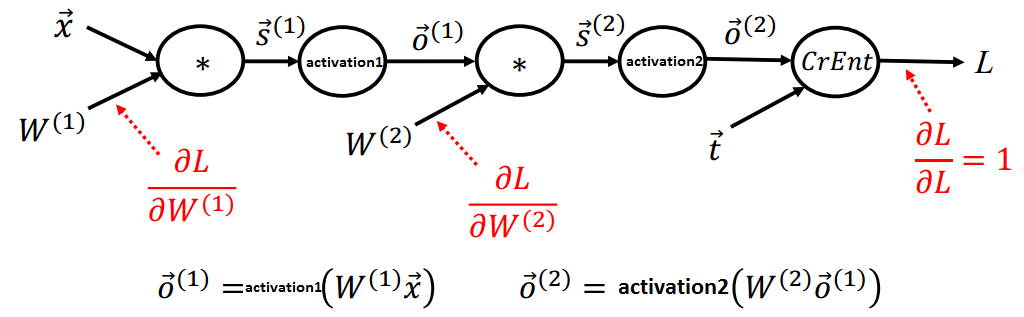

In [1]:
from IPython import display
display.Image('img/nn_graph.png')

## Gradient Ascent Update Rules

The Cost Function is the Mean Squared Error Likelihood Estimate:
$$E(W) = \frac{1}{2} \cdot \sum_{n=1}^{N}\sum_{k=1}^{K}(T-Y)^2 - \frac{\lambda}{2} \cdot ||W||^2$$

**where $Y = S_2$ and $\lambda$ denotes the regularization term**

The partial gradient of the Loss Function wrt (with respect to) the weights $W^{(2)}$ is:
$$\frac{\partial E(W)}{\partial W^{(2)}} = (T-Y)^T \cdot O_1 - \lambda \cdot W^{(2)}$$

The partial gradient of the Loss Function wrt the weights $W^{(1)}$, can be calculated using the chain rule as such:
$$\frac{\partial E(W)}{\partial W^{(1)}} = \frac{\partial E(W)}{\partial S_2} \cdot \frac{\partial S_2}{\partial O_1} \cdot \frac{\partial O_1}{\partial S_1} \cdot \frac{\partial S_1}{\partial W^{(1)}} - \lambda \cdot W^{(1)} =>$$

$$\frac{\partial E(W)}{\partial W^{(1)}} = ( (T-Y) \cdot W^{(2)}[:][2:end] \cdot \frac{\partial O_1}{\partial S_1} )^T \times X - \lambda \cdot W^{(1)}$$

**where $\times$ denotes the element-wise multiplication**

The update rule for $W^{(1)}$ is: $$W^{(1)} = W^{(1)} + \eta \cdot \frac{\partial E(W)}{\partial W^{(1)}}$$

The update rule for $W^{(2)}$ is: $$W^{(2)} = W^{(2)} + \eta \cdot \frac{\partial E(W)}{\partial W^{(2)}}$$

**where $eta$ denotes the learning rate (small positive number)**

## Gradient Descent Update Rules

The Cost Function is the Mean Squared Error Loss:
$$E(W) = \frac{1}{2} \cdot \sum_{n=1}^{N}\sum_{k=1}^{K}(Y-T)^2 + \frac{\lambda}{2} \cdot ||W||^2$$

**where $Y = S_2$ and $lambda$ denotes the regularization term**

The partial gradient of the Loss Function wrt the weights $W^{(2)}$ is:
$$\frac{\partial E(W)}{\partial W^{(2)}} = (Y-T)^T \cdot O_1 + \lambda \cdot W^{(2)}$$

The partial gradient of the Loss Function wrt the weights $W^{(1)}$, can be calculated using the chain rule as such:
$$\frac{\partial E(W)}{\partial W^{(1)}} = \frac{\partial E(W)}{\partial S_2} \cdot \frac{\partial S_2}{\partial O_1} \cdot \frac{\partial O_1}{\partial S_1} \cdot \frac{\partial S_1}{\partial W^(1)} + \lambda \cdot W^{(1)} =>$$

$$\frac{\partial E(W)}{\partial W^{(1)}} = ( (Y-T) \cdot W^{(2)}[:][2:end] \cdot \frac{\partial O_1}{\partial S_1} )^T \times X + \lambda \cdot W^{(1)}$$

**where $\times$ denotes the element-wise multiplication**

The update rule for $W^{(1)}$ is: $$W^{(1)} = W^{(1)} - \eta \cdot \frac{\partial E(W)}{\partial W^{(1)}}$$

The update rule for $W^{(2)}$ is: $$W^{(2)} = W^{(2)} - \eta \cdot \frac{\partial E(W)}{\partial W^{(2)}}$$

**where $eta$ denotes the learning rate (small positive number)**

**Note:** The same update rules for Gradient Descent and Gradient Ascent apply in the case of Cross Entropy Loss Function, incidentally! The calculations for it are omitted.

## Difference Between Gradient Ascent and Gradient Descent

The Gradient Ascent algorithm has opposite signs in 3 places, from the Gradient Descent algorithm:
1. Firstly, the two algorithms have different signs in their **cost functions**. In the cost function (likelihood estimate) of the Gradient Ascent algorith, the symbol T has a positive sign(+), the symbol Y has a negative sign(-) and the regularization term has a negative sign(-). On the contrary, in the cost function (loss) of the Gradient Descent algorith, the symbol T has a negative sign(-), the symbol Y has a positive sign(+) and the regularization term has a positive sign(+).
2. Secondly, the two algorithms have opposite signs in the **partial gradients** of the loss function with respect to each weight, for the symbols Y and T again. In the Gradient Ascent algorithm, the term *T-Y* appears, whereas in the Gradient Descent algorithm the term *Y-T* appears instead.
3. Finally, the signs between the two algorithms are different in the **update rules** of each weight. The Gradient Ascent has a positive sign(+) in its weights update rules, hence the naming Ascent. On the other hand, the Gradient Descent algorithm has a negative sign(-) in its weights update rules, hence the naming Descent.

The reason behind the opposite signs is that the Gradient Ascent algorithm aims to maximize its likelihood estimate function, whereas the Gradient Descent algorithm aims to minimize its loss function.
In addition, the two algorithm should have the same results for their cost functions, in each iteration, but with different signs.
From a more general point of view, the Gradient Ascent and Gradient Descent algorithms have the same purpose and they achieve identical accuracy on the classifier on which they are applied. In this case, the classifier is a Neural Network.